Setup & Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest


np.random.seed(42)
import warnings
warnings.filterwarnings('ignore')
# Path to dataset in Google Drive
data_path = '/content/drive/MyDrive/Mall_Customers.csv'

# Load CSV
df = pd.read_csv(data_path)

# Preview data
df.head()
print("Dataset shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
df.info()


Mounted at /content/drive
Dataset shape: (200, 5)

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Data Exploration & Preprocessing

In [ ]:
df.info()
df.describe()
# Encode Gender
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
# Drop CustomerID
X = df.drop(columns=['CustomerID'])
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Clustering Analysis (K-Means)

Elbow Method

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

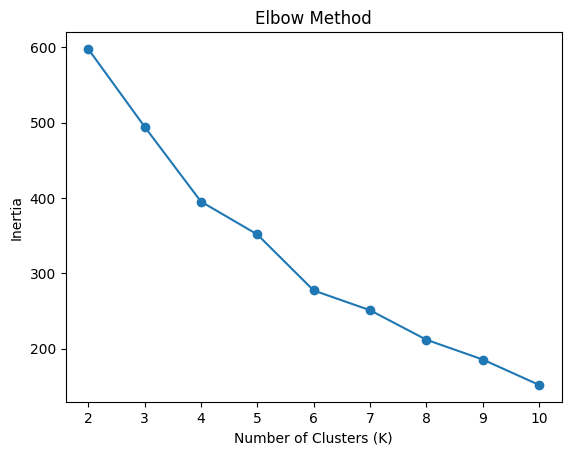

In [ ]:
inertia = []

K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

    plt.figure()
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()



Silhouette Scores

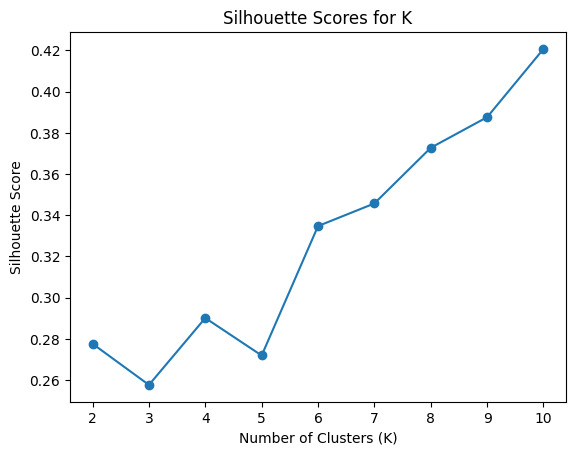

In [ ]:
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure()
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for K')
plt.show()


Train Final K-Means Model

(Assume K = 4 )

In [ ]:
k_final = 4

kmeans = KMeans(n_clusters=k_final, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,2
1,2,0,21,15,81,2
2,3,1,20,16,6,3
3,4,1,23,16,77,3
4,5,1,31,17,40,3


Cluster Characterization

In [ ]:
cluster_summary = df.groupby('Cluster').mean()
cluster_summary


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
0,67.783333,0.566667,54.700000,46.900000,39.933333
1,164.529412,0.411765,41.264706,88.500000,16.764706
2,100.809524,0.000000,28.690476,60.904762,70.238095
3,96.953125,1.000000,29.375000,58.296875,64.437500


Dimensionality Reduction

PCA

Explained Variance Ratio: [0.33690046 0.26230645]
Total Explained Variance: 0.5992069019819846


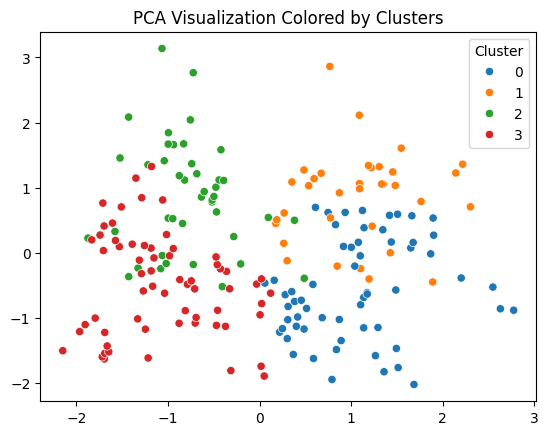

In [ ]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Explained Variance:", pca.explained_variance_ratio_.sum())

plt.figure()
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=df['Cluster'],
    palette='tab10'
)
plt.title('PCA Visualization Colored by Clusters')
plt.show()


t-SNE

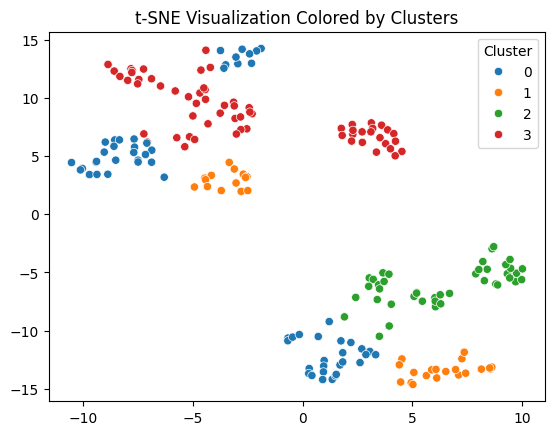

In [ ]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure()
sns.scatterplot(
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    hue=df['Cluster'],
    palette='tab10'
)
plt.title('t-SNE Visualization Colored by Clusters')
plt.show()


Anomaly Detection (Isolation Forest)

Try Multiple Contamination Values

In [ ]:
contaminations = [0.01, 0.05, 0.1]

for c in contaminations:
    iso = IsolationForest(contamination=c, random_state=42)
    preds = iso.fit_predict(X_scaled)
    print(f"Contamination {c}: {(preds == -1).sum()} anomalies")


Contamination 0.01: 2 anomalies
Contamination 0.05: 10 anomalies
Contamination 0.1: 20 anomalies


Final Isolation Forest Model

(Assume 0.05 chosen)

In [ ]:
iso_final = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly'] = iso_final.fit_predict(X_scaled)
df['Anomaly'].value_counts()


,count
Anomaly,
1,190
-1,10


View Anomalous Customers

In [ ]:
anomalies = df[df['Anomaly'] == -1]
anomalies.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Anomaly
0,1,0,19,15,39,2,-1
2,3,1,20,16,6,3,-1
8,9,0,64,19,3,0,-1
10,11,0,67,19,14,0,-1
30,31,0,60,30,4,0,-1


Visualize Anomalies on PCA

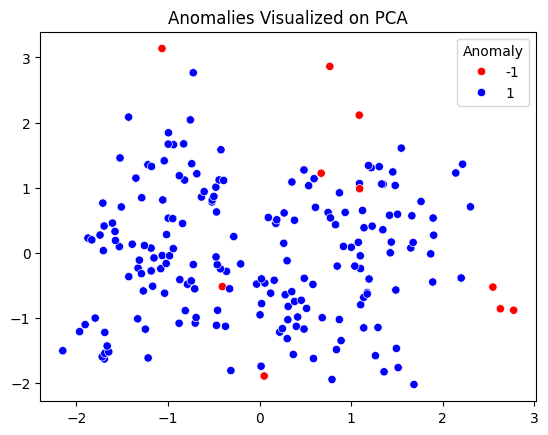

In [ ]:
plt.figure()
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=df['Anomaly'],
    palette={1: 'blue', -1: 'red'}
)
plt.title('Anomalies Visualized on PCA')
plt.show()


Which Clusters Have More Anomalies?

In [ ]:
anomalies_per_cluster = anomalies['Cluster'].value_counts()
anomalies_per_cluster


,count
Cluster,
1,4
0,3
2,2
3,1


Integrated Analysis

In [ ]:
# Summary counts
df.groupby(['Cluster', 'Anomaly']).size()


Cluster  Anomaly
0        -1          3
          1         57
1        -1          4
          1         30
2        -1          2
          1         40
3        -1          1
          1         63
dtype: int64